In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import pylab as pl

In [3]:
data = pd.read_csv('data/cell_samples.csv')
data.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [4]:
data = data.drop(['BareNuc'], axis = 1)
data.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,3,1,1,2
1,1002945,5,4,4,5,7,3,2,1,2
2,1015425,3,1,1,1,2,3,1,1,2
3,1016277,6,8,8,1,3,3,7,1,2
4,1017023,4,1,1,3,2,3,1,1,2


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
ID             699 non-null int64
Clump          699 non-null int64
UnifSize       699 non-null int64
UnifShape      699 non-null int64
MargAdh        699 non-null int64
SingEpiSize    699 non-null int64
BlandChrom     699 non-null int64
NormNucl       699 non-null int64
Mit            699 non-null int64
Class          699 non-null int64
dtypes: int64(10)
memory usage: 54.7 KB


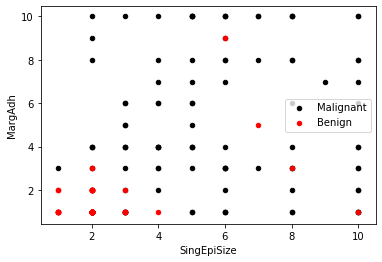

In [6]:
ax = data[data['Class'] == 4][0:100].plot(kind = 'scatter', x = 'SingEpiSize', y = 'MargAdh', color = 'k', label = 'Malignant')
data[data['Class'] == 2][0:100].plot(kind = 'scatter', x = 'SingEpiSize', y = 'MargAdh', label = 'Benign', color = 'red', ax = ax)
plt.show()

In [7]:
data.columns

Index(['ID', 'Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BlandChrom', 'NormNucl', 'Mit', 'Class'],
      dtype='object')

In [8]:
x = data[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BlandChrom', 'NormNucl', 'Mit']]
x.head()

,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BlandChrom,NormNucl,Mit
0,5,1,1,1,2,3,1,1
1,5,4,4,5,7,3,2,1
2,3,1,1,1,2,3,1,1
3,6,8,8,1,3,3,7,1
4,4,1,1,3,2,3,1,1


In [9]:
y = data['Class']
y.head()

0    2
1    2
2    2
3    2
4    2
Name: Class, dtype: int64

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 4)

In [11]:
x_train.shape

(489, 8)

In [12]:
x_test.shape

(210, 8)

In [13]:
y_train.shape

(489,)

In [14]:
y_test.shape

(210,)

In [15]:
from sklearn.linear_model import LogisticRegression
regr = LogisticRegression(solver = 'lbfgs', C = 0.01, max_iter = 1000)
regr.fit(x_train, y_train)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
y_test[0:10]

236    4
463    2
72     2
288    4
178    2
442    2
639    2
300    4
42     4
238    4
Name: Class, dtype: int64

In [17]:
yhat = regr.predict(x_test)
yhat[0:20]

array([4, 2, 2, 2, 2, 2, 2, 4, 4, 4, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2],
      dtype=int64)

In [18]:
a_1 = regr.score(x_train, y_train)
a_1

0.9631901840490797

In [19]:
a_2 = regr.score(x_test, y_test)
a_2

0.9428571428571428

In [20]:
a_3 = regr.score(x_test, yhat)
a_3

1.0

In [21]:
yhat_proba = regr.predict_proba(x_test)
yhat_proba[0:5]

array([[0.00747352, 0.99252648],
       [0.97116952, 0.02883048],
       [0.82606605, 0.17393395],
       [0.51515967, 0.48484033],
       [0.95835461, 0.04164539]])

In [22]:
from sklearn.metrics import accuracy_score, jaccard_similarity_score
a_4 = accuracy_score(y_test, yhat)
a_4

0.9428571428571428

In [23]:
a_5 = jaccard_similarity_score(y_test, yhat)
a_5

c:\users\raghavendra\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


0.9428571428571428

In [24]:
from sklearn import neighbors
knn = neighbors.KNeighborsClassifier(n_neighbors = 1, metric = 'manhattan')
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [25]:
y_test[0:10]

236    4
463    2
72     2
288    4
178    2
442    2
639    2
300    4
42     4
238    4
Name: Class, dtype: int64

In [26]:
y_pred = knn.predict(x_test)
y_pred[0:10]

array([4, 2, 2, 4, 2, 2, 2, 4, 4, 4], dtype=int64)

In [27]:
b_1 = knn.score(x_train, y_train)
b_1

0.9979550102249489

In [28]:
b_2 = knn.score(x_test, y_test)
b_2

0.9428571428571428

In [29]:
b_3 = knn.score(x_test, y_pred)
b_3

1.0

In [30]:
b_4 = accuracy_score(y_test, y_pred)
b_4

0.9428571428571428

In [31]:
b_5 = jaccard_similarity_score(y_test, y_pred)
b_5

c:\users\raghavendra\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


0.9428571428571428

In [32]:
from sklearn import svm
clf = svm.SVC(kernel = 'poly', gamma = 'auto', C = 0.001)
clf.fit(x_train, y_train)

SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [33]:
y_test[0:10]

236    4
463    2
72     2
288    4
178    2
442    2
639    2
300    4
42     4
238    4
Name: Class, dtype: int64

In [34]:
yhat_1 = clf.predict(x_test)
yhat_1[0:10]

array([4, 2, 2, 4, 2, 2, 2, 4, 4, 4], dtype=int64)

In [35]:
c_1 = clf.score(x_train, y_train)
c_1

0.9775051124744376

In [36]:
c_2 = clf.score(x_test, y_test)
c_2

0.9428571428571428

In [37]:
c_3 = clf.score(x_test, yhat_1)
c_3

1.0

In [38]:
c_4 = accuracy_score(y_test, yhat_1)
c_4

0.9428571428571428

In [39]:
c_5 = jaccard_similarity_score(y_test, yhat_1)
c_5

c:\users\raghavendra\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


0.9428571428571428

In [40]:
from sklearn import tree
clf_1 = tree.DecisionTreeClassifier()
clf_1.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [41]:
y_test[0:10]

236    4
463    2
72     2
288    4
178    2
442    2
639    2
300    4
42     4
238    4
Name: Class, dtype: int64

In [42]:
ypred_1 = clf_1.predict(x_test)
ypred_1[0:10]

array([4, 2, 4, 4, 2, 2, 2, 4, 4, 4], dtype=int64)

In [43]:
d_1 = clf_1.score(x_train, y_train)
d_1

0.9979550102249489

In [44]:
d_2 = clf_1.score(x_test, y_test)
d_2

0.9238095238095239

In [45]:
d_3 = clf.score(x_test, ypred_1)
d_3

0.9523809523809523

In [46]:
d_4 = accuracy_score(y_test, ypred_1)
d_4

0.9238095238095239

In [47]:
d_5 = jaccard_similarity_score(y_test, ypred_1)
d_5

c:\users\raghavendra\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


0.9238095238095239

In [48]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
gsn = GaussianNB()
gsn.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [49]:
y_test

236    4
463    2
72     2
288    4
178    2
      ..
652    2
25     4
378    2
577    2
567    2
Name: Class, Length: 210, dtype: int64

In [50]:
yhat_2 = gsn.predict(x_test)
yhat_2[0:5]

array([4, 2, 2, 4, 2], dtype=int64)

In [51]:
e_1 = gsn.score(x_train, y_train)
e_1

0.950920245398773

In [52]:
e_2 = gsn.score(x_test, y_test)
e_2

0.9523809523809523

In [53]:
e_3 = gsn.score(x_test, yhat_2)
e_3

1.0

In [54]:
e_4 = accuracy_score(y_test, yhat_2)
e_4

0.9523809523809523

In [55]:
e_5 = jaccard_similarity_score(y_test, yhat_2)
e_5

c:\users\raghavendra\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


0.9523809523809523

In [56]:
mul = MultinomialNB()
mul.fit(x_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [57]:
y_test[0:5]

236    4
463    2
72     2
288    4
178    2
Name: Class, dtype: int64

In [58]:
ypred_2 = mul.predict(x_test)
ypred_2[0:5]

array([2, 2, 4, 2, 2], dtype=int64)

In [59]:
f_1 = mul.score(x_train, y_train)
f_1


0.8650306748466258

In [60]:
f_2 = mul.score(x_test, y_test)
f_2

0.8523809523809524

In [61]:
f_3 = mul.score(x_test, ypred_2)
f_3

1.0

In [62]:
f_4 = np.nan
f_4

nan

In [63]:
f_5 = np.nan
f_5

nan

In [64]:
ber = BernoulliNB()
ber.fit(x_train, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [65]:
y_test

236    4
463    2
72     2
288    4
178    2
      ..
652    2
25     4
378    2
577    2
567    2
Name: Class, Length: 210, dtype: int64

In [66]:
yhat_3 = ber.predict(x_test)
yhat_3

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [67]:
g_1 = ber.score(x_train, y_train)
g_1

0.65439672801636

In [68]:
g_2 = ber.score(x_test, y_test)
g_2

0.6571428571428571

In [69]:
g_3 = ber.score(x_test, yhat_3)
g_3

1.0

In [70]:
g_4 = accuracy_score(y_test, yhat_3)
g_4

0.6571428571428571

In [71]:
g_5 = jaccard_similarity_score(y_test, yhat_3)
g_5

c:\users\raghavendra\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


0.6571428571428571

In [72]:
from sklearn.ensemble import RandomForestClassifier
cl = RandomForestClassifier(n_estimators = 1000)
cl.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [73]:
y_test[0:10]

236    4
463    2
72     2
288    4
178    2
442    2
639    2
300    4
42     4
238    4
Name: Class, dtype: int64

In [74]:
ypred_3 = cl.predict(x_test)
ypred_3

array([4, 2, 2, 4, 2, 2, 2, 4, 4, 4, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 2, 4,
       2, 2, 2, 2, 2, 2, 4, 4, 2, 4, 2, 2, 2, 4, 2, 4, 4, 2, 2, 4, 4, 2,
       2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 4, 4, 4, 4, 2, 2, 4, 4, 4, 2,
       2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 4, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 4,
       4, 2, 2, 2, 2, 4, 4, 4, 2, 4, 4, 2, 4, 2, 4, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 4, 2, 4, 4, 2, 2, 2, 4, 2, 4, 2, 2, 2, 2, 4, 2, 4, 2, 2,
       2, 4, 2, 4, 2, 2, 4, 4, 4, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 4, 2, 4, 2, 2, 4, 2, 4, 2, 4, 2, 2, 2, 2, 4, 2, 4, 4,
       4, 2, 4, 2, 2, 4, 2, 4, 2, 2, 2, 2, 4, 4, 2, 4, 2, 4, 2, 2, 2, 2,
       2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [75]:
h_1 = cl.score(x_train, y_train)
h_1

0.9979550102249489

In [76]:
h_2 = cl.score(x_test, y_test)
h_2

0.9666666666666667

In [77]:
h_3 = cl.score(x_test, ypred_3)
h_3

1.0

In [78]:
h_4 = accuracy_score(y_test, ypred_3)
h_4

0.9666666666666667

In [79]:
h_5 = jaccard_similarity_score(y_test, ypred_3)
h_5

c:\users\raghavendra\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


0.9666666666666667

In [80]:
df = pd.DataFrame({'Training Score' : [a_1, b_1, c_1, d_1, e_1, f_1, g_1, h_1],
                  'Testing Score' : [a_2, b_2, c_2, d_2, e_2, f_2, g_2, h_2],
                  'Predicted Score' : [a_3, b_3, c_3, d_3, e_3, f_3, g_3, h_3],
                  'Accuracy Score' : [a_4, b_4, c_4, d_4, e_4, f_4, g_4, h_4],
                  'Jaccard Similarity Score' : [a_5, b_5, c_5, d_5, e_5, f_5, g_5, h_5]}, index = ['Logistic Regression', 'KNN', 'SVM', 'Decision Tree', 'Gaussian NB', 'Multinomial NB', 'Bernoulli NB', 'Random Forest'])
df

,Training Score,Testing Score,Predicted Score,Accuracy Score,Jaccard Similarity Score
Logistic Regression,0.963190,0.942857,1.000000,0.942857,0.942857
KNN,0.997955,0.942857,1.000000,0.942857,0.942857
SVM,0.977505,0.942857,1.000000,0.942857,0.942857
Decision Tree,0.997955,0.923810,0.952381,0.923810,0.923810
Gaussian NB,0.950920,0.952381,1.000000,0.952381,0.952381
Multinomial NB,0.865031,0.852381,1.000000,NaN,NaN
Bernoulli NB,0.654397,0.657143,1.000000,0.657143,0.657143
Random Forest,0.997955,0.966667,1.000000,0.966667,0.966667
